In [107]:
# prompt: extract Zipfile using zipfile

import zipfile

def extract_zip(zip_filepath, extract_dir):
  with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Example usage
# Replace 'path/to/your/file.zip' with the actual path to your zip file
# Replace 'path/to/extract/directory' with the directory where you want to extract the files
extract_zip('/content/archive (3).zip', '/content')


In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [109]:
df = pd.read_csv("/content/UpdatedResumeDataSet.csv")
df.sample(5)

,Category,Resume
715,Database,"Technical Skills Databases: Oracle RDBMS- 10g,..."
845,DotNet Developer,TECHNICAL SKILLS â¢ Web Technologies: ASP .NE...
517,Operations Manager,IT SKILLS â¢ Well versed with MS Office and I...
240,Sales,Education Details \r\n Bachelor's \r\n Bache...
478,Automation Testing,"Technical Skills Summary I have completed ""COR..."


In [110]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [111]:
df.isnull().sum()

,0
Category,0
Resume,0


In [112]:
df.duplicated().sum()

796

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [114]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


In [115]:
copy_value= df['Category'].unique().copy()

In [116]:
copy_value

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

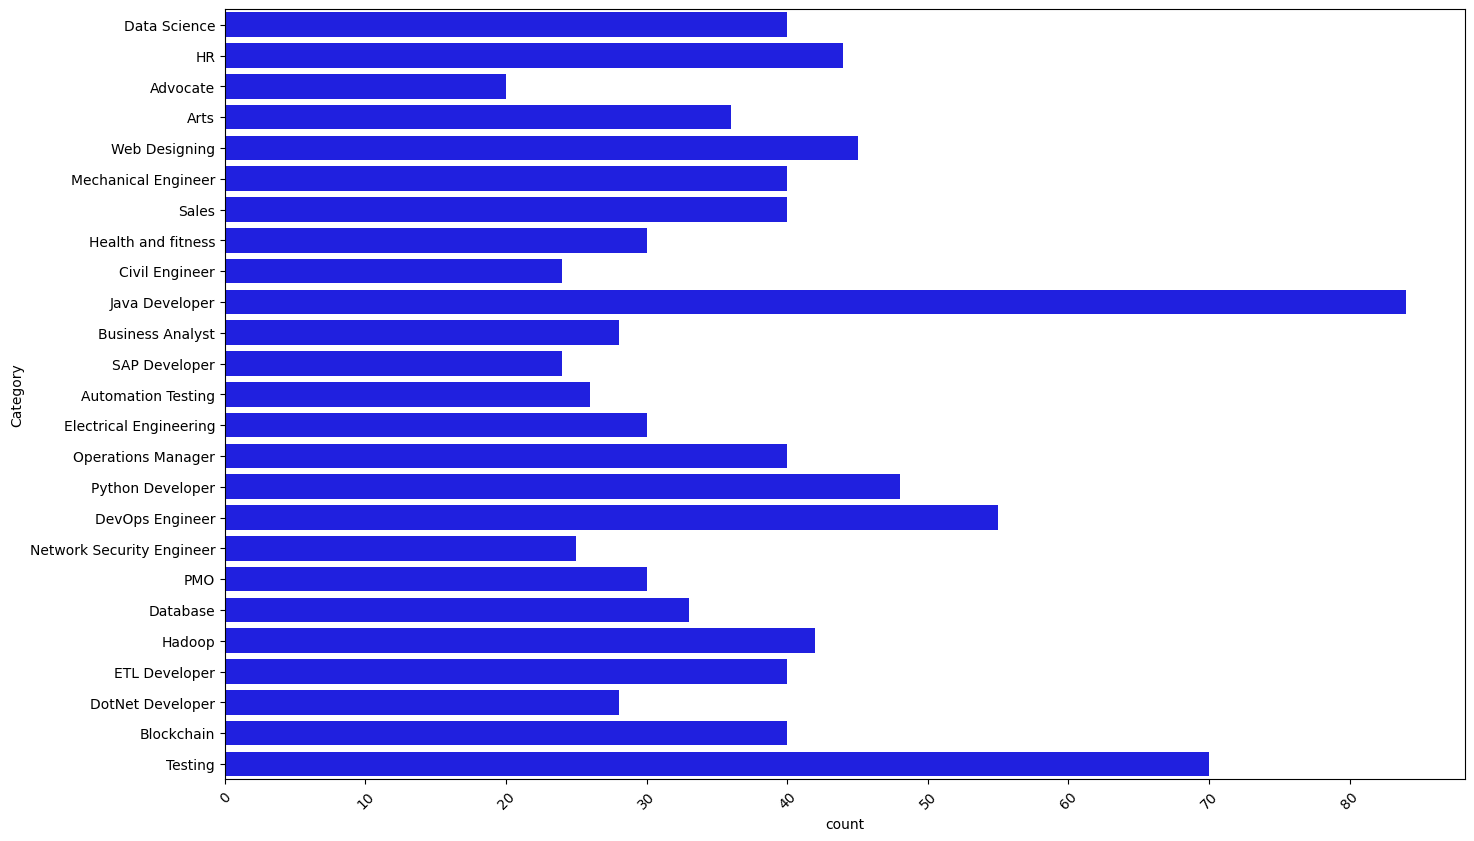

In [117]:
plt.figure(figsize=(16, 10))
sns.countplot(df['Category'],color='blue' )
plt.xticks(rotation=45)
plt.show()

In [118]:
import re

def clean_text(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text)
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text

df['Resume'] = df['Resume'].apply(clean_text)




In [119]:
df['Resume'][3]

'Skills R Python SAP HANA Tableau SAP HANA SQL SAP HANA PAL MS SQL SAP Lumira C Linear Programming Data Modelling Advance Analytics SCM Analytics Retail Analytics Social Media Analytics NLP Education Details January 2017 to January 2018 PGDM Business Analytics Great Lakes Institute of Management Illinois Institute of Technology January 2013 Bachelor of Engineering Electronics and Communication Bengaluru Karnataka New Horizon College of Engineering Bangalore Visvesvaraya Technological University Data Science Consultant Consultant Deloitte USI Skill Details LINEAR PROGRAMMING Exprience 6 months RETAIL Exprience 6 months RETAIL MARKETING Exprience 6 months SCM Exprience 6 months SQL Exprience Less than 1 year months Deep Learning Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Python Exprience Less than 1 year months R Exprience Less than 1 year monthsCompany Details company Deloitte USI description The project involved analysing historic deals and com

In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])


In [136]:
job_number= df['Category'].unique().copy()

In [122]:
# prompt: use Tfidf vectorizer Rusume columns

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_vec_data = tfidf.fit_transform(df['Resume'])
tfidf_vec_data.shape


(962, 7351)

In [123]:
tfidf_vec_data.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [137]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(tfidf_vec_data, df['Category'], test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((769, 7351), (193, 7351), (769,), (193,))

In [138]:
# prompt: model train multiple algoritms chack best accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
    results[model_name] = accuracy

# Print results
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy}")

# Find the best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with accuracy {results[best_model]}")


Logistic Regression: 0.9948186528497409
SVM: 0.9948186528497409
Naive Bayes: 0.9637305699481865
Decision Tree: 0.9948186528497409
Random Forest: 0.9948186528497409

Best Model: Logistic Regression with accuracy 0.9948186528497409


In [139]:
# prompt: oita k pkl file dump koro  Logistic Regression k

import pickle

# Assuming 'model' is your trained Logistic Regression model
# Replace 'LogisticRegression()' with your actual trained model
model = LogisticRegression() # This is just a placeholder. Replace with your trained model.
model.fit(x_train, y_train) # Train the model (if not already trained)

# Save the model to a pickle file
filename = 'finalized_model_v2.pkl'
pickle.dump(model, open(filename, 'wb'))


In [140]:
# prompt: tfidf eta ki pkl file a dump koro

import pickle

# Assuming 'tfidf' is your TfidfVectorizer object
# Replace 'tfidf' with your actual TfidfVectorizer object.

# Save the tfidf object to a pickle file
filename = 'tfidf.pkl'
pickle.dump(tfidf, open(filename, 'wb'))


In [141]:
job_category = ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']


In [142]:
job_category

['Data Science',
 'HR',
 'Advocate',
 'Arts',
 'Web Designing',
 'Mechanical Engineer',
 'Sales',
 'Health and fitness',
 'Civil Engineer',
 'Java Developer',
 'Business Analyst',
 'SAP Developer',
 'Automation Testing',
 'Electrical Engineering',
 'Operations Manager',
 'Python Developer',
 'DevOps Engineer',
 'Network Security Engineer',
 'PMO',
 'Database',
 'Hadoop',
 'ETL Developer',
 'DotNet Developer',
 'Blockchain',
 'Testing']

In [143]:
combined = dict(zip(job_category, job_number))

{'Data Science': 6,
 'HR': 12,
 'Advocate': 0,
 'Arts': 1,
 'Web Designing': 24,
 'Mechanical Engineer': 16,
 'Sales': 22,
 'Health and fitness': 14,
 'Civil Engineer': 5,
 'Java Developer': 15,
 'Business Analyst': 4,
 'SAP Developer': 21,
 'Automation Testing': 2,
 'Electrical Engineering': 11,
 'Operations Manager': 18,
 'Python Developer': 20,
 'DevOps Engineer': 8,
 'Network Security Engineer': 17,
 'PMO': 19,
 'Database': 7,
 'Hadoop': 13,
 'ETL Developer': 10,
 'DotNet Developer': 9,
 'Blockchain': 3,
 'Testing': 23}

In [145]:
filename = 'jobs_category'
pickle.dump(combined, open(filename, 'wb'))

In [146]:
# prompt: load pkl file

import pickle
loaded_model = pickle.load(open('finalized_model_v2.pkl', 'rb'))
loaded_tfidf = pickle.load(open('tfidf.pkl', 'rb'))
loaded_jobs = pickle.load(open('jobs_category', 'rb'))

In [149]:
# prompt: pridect model

import pickle

# Load the saved model, tfidf vectorizer, and job categories
loaded_model = pickle.load(open('finalized_model_v2.pkl', 'rb'))
loaded_tfidf = pickle.load(open('tfidf.pkl', 'rb'))
loaded_jobs = pickle.load(open('jobs_category', 'rb'))


def predict_resume_category(resume_text):
    """Predicts the category of a given resume text.

    Args:
        resume_text: The text of the resume.

    Returns:
        The predicted job category.
    """
    # Clean the input resume text
    import re
    def clean_text(text):
        text = re.sub('http\S+\s*', ' ', text)  # remove URLs
        text = re.sub('RT|cc', ' ', text)  # remove RT and cc
        text = re.sub('#\S+', '', text)  # remove hashtags
        text = re.sub('@\S+', '  ', text)  # remove mentions
        text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
        text = re.sub(r'[^\x00-\x7f]',r' ', text)
        text = re.sub('\s+', ' ', text)  # remove extra whitespace
        return text
    cleaned_resume = clean_text(resume_text)

    # Transform the cleaned text using the loaded TF-IDF vectorizer
    tfidf_vec_data = loaded_tfidf.transform([cleaned_resume])

    # Make a prediction using the loaded model
    prediction = loaded_model.predict(tfidf_vec_data)[0]

    # Get the job category corresponding to the predicted number
    reverse_job_dict = {v:k for k,v in loaded_jobs.items()}
    predicted_category = reverse_job_dict.get(prediction)

    return predicted_category


resume_text =""" """



predicted_job_category = predict_resume_category(resume_text)
print(f"Predicted Job Category: {predicted_job_category}")


Predicted Job Category: Sales
